In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch as torch
import torch.nn as nn

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from google.colab import files # 11mins
uploaded = files.upload()

Saving df1_sample.csv to df1_sample.csv
Saving df2_sample.csv to df2_sample.csv
Saving targets_sample.csv to targets_sample.csv


In [3]:
input_x1 = pd.read_csv('df1_sample.csv')
input_x2 = pd.read_csv('df2_sample.csv')
target_y = pd.read_csv('targets_sample.csv')

# Drop the first column
input_x1 = input_x1.drop(input_x1.columns[0], axis=1)
input_x2 = input_x2.drop(input_x2.columns[0], axis=1)

# Convert to numpy
input_x1 = input_x1.to_numpy()
input_x2 = input_x2.to_numpy()
target_y = target_y.to_numpy()

print(input_x1.shape)
print(input_x2.shape)
print(target_y.shape)



(350000, 20)
(350000, 20)
(350000, 1)


In [5]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(20, 16)
        self.fc2 = nn.Linear(16, 9)
        self.fc3 = nn.Linear(9, 3)
        self.fc4 = nn.Linear(3, 1)
        self.sigmoid = nn.Sigmoid()
        self.relu = nn.ReLU()
        self.criterion = nn.MSELoss()
        self.optimizer = torch.optim.SGD(self.parameters(), lr=0.01)



    def forward(self, x1, x2):
        # Element-wise subtraction
        x = x1 - x2
        # Forward pass with shared weights
        x = self.sigmoid(self.fc1(x))
        x = self.sigmoid(self.fc2(x))
        x = self.sigmoid(self.fc3(x))
        x = self.fc4(x)
        return x

    def loss(self, output, target):
        return self.criterion(output, target)

    def backward(self, loss):
        loss.backward()

    def train(self, x1, x2, target):
        # Forward pass
        output = self.forward(x1, x2)
        # Compute the loss
        loss = self.loss(output, target)
        # Zero the gradients
        self.optimizer.zero_grad()
        # Backward pass
        self.backward(loss)
        # Update the weights
        self.optimizer.step()
        return loss



In [6]:
error = {}
model = Net()
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)
for epoch in range(9):  # Adjust epochs as needed: 3 epochs takes 27 minutes
  for j in range(len(input_x1)):
    # Move data to GPU (if available)
    x1 = torch.tensor(input_x1[j], dtype=torch.float32)
    x2 = torch.tensor(input_x2[j], dtype=torch.float32)
    target = torch.tensor(target_y[j], dtype=torch.float32)


    x1 = x1.to(device)
    x2 = x2.to(device)
    targets = target.to(device)

    model.train(x1, x2, targets)
    if j % 10000 == 0:
      print(str(epoch) + ":" + str(j))
  error[epoch] = model.loss(model.forward(x1, x2), targets).item()
  print(error[epoch])



0:0
0:10000
0:20000
0:30000
0:40000
0:50000
0:60000
0:70000
0:80000
0:90000
0:100000
0:110000
0:120000
0:130000
0:140000
0:150000
0:160000
0:170000
0:180000
0:190000
0:200000
0:210000
0:220000
0:230000
0:240000
0:250000
0:260000
0:270000
0:280000
0:290000
0:300000
0:310000
0:320000
0:330000
0:340000
0.338758647441864
1:0
1:10000
1:20000
1:30000
1:40000
1:50000
1:60000
1:70000
1:80000
1:90000
1:100000
1:110000
1:120000
1:130000
1:140000
1:150000
1:160000
1:170000
1:180000
1:190000
1:200000
1:210000
1:220000
1:230000
1:240000
1:250000
1:260000
1:270000
1:280000
1:290000
1:300000
1:310000
1:320000
1:330000
1:340000
0.3863941431045532
2:0
2:10000
2:20000
2:30000
2:40000
2:50000
2:60000
2:70000
2:80000
2:90000
2:100000
2:110000
2:120000
2:130000
2:140000
2:150000
2:160000
2:170000
2:180000
2:190000
2:200000
2:210000
2:220000
2:230000
2:240000
2:250000
2:260000
2:270000
2:280000
2:290000
2:300000
2:310000
2:320000
2:330000
2:340000
0.4074082374572754
3:0
3:10000
3:20000
3:30000
3:40000
3:500

# Results of training

In [7]:
uploaded = files.upload()

Saving characters.csv to characters.csv
Saving trained_sample.pth to trained_sample.pth


In [9]:
torch.save(model, "trained_sample.pth")

In [10]:
chars = pd.read_csv('characters.csv') #TODO change this to 'characters.csv'

In [11]:
chars

,Unnamed: 0,Man,Woman,Pregnant,Stroller,OldMan,OldWoman,Boy,Girl,Homeless,...,LargeMan,Criminal,MaleExecutive,FemaleExecutive,FemaleAthlete,MaleAthlete,FemaleDoctor,MaleDoctor,Dog,Cat
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,5,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,6,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
rank = []
labels = []
c = chars.columns[1:]
for char in c:
  rank.append(chars[char].tolist())
  labels.append(char)

print(rank)
print(labels)


[[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 

In [14]:
ranks = {}
for i in range(len(labels)):
  t1 = rank[i]
  t2 = np.zeros(20)

  t1 = torch.tensor(t1, dtype=torch.float32)
  t2 = torch.tensor(t2, dtype=torch.float32)

  t1 = t1.to(device)
  t2 = t2.to(device)
  m = float(model.forward(t1,t2))
  ranks[labels[i]] = m

print(ranks)




{'Man': 0.7030535936355591, 'Woman': 0.711517870426178, 'Pregnant': 0.7448011636734009, 'Stroller': 0.7523080110549927, 'OldMan': 0.6480434536933899, 'OldWoman': 0.655048131942749, 'Boy': 0.7432578802108765, 'Girl': 0.7410088777542114, 'Homeless': 0.6650252342224121, 'LargeWoman': 0.6996065378189087, 'LargeMan': 0.6725271344184875, 'Criminal': 0.5106523633003235, 'MaleExecutive': 0.6929348111152649, 'FemaleExecutive': 0.7070587277412415, 'FemaleAthlete': 0.7136169075965881, 'MaleAthlete': 0.705409049987793, 'FemaleDoctor': 0.7250455021858215, 'MaleDoctor': 0.7308880686759949, 'Dog': 0.5612237453460693, 'Cat': 0.5287021994590759}


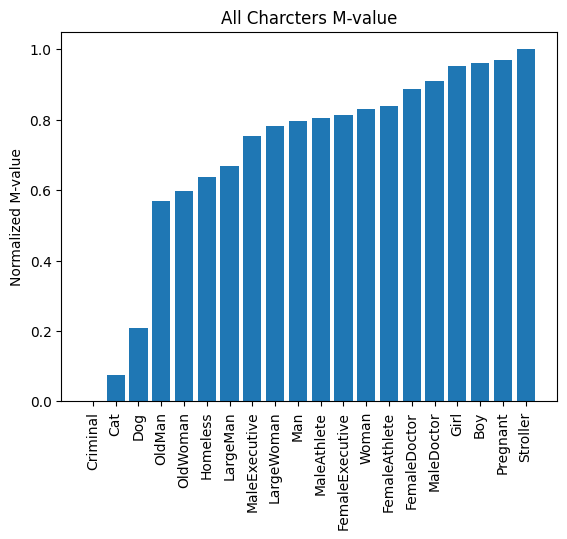

In [15]:
sorted_d = sorted(ranks.items(), key=lambda x: x[1])

x = [i[1] for i in sorted_d]
labels = [i[0] for i in sorted_d]

x = np.array(x)
x1 = x - x.min()
x1 = x1 / x1.max()


plt.bar(labels, x1)
plt.ylabel('Normalized M-value')
plt.title('All Charcters M-value')

plt.xticks(rotation=90)
plt.show()




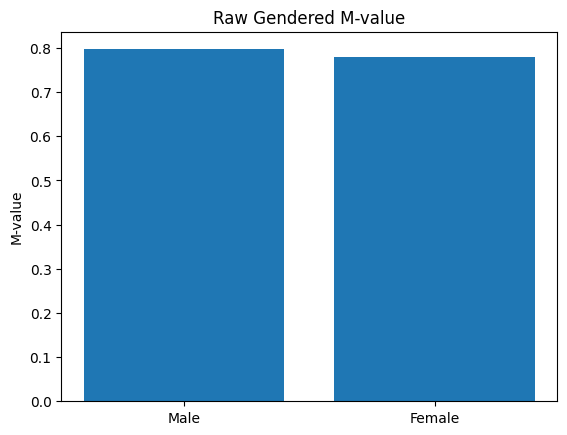

In [35]:

labels = ['Man', 'Woman', 'Pregnant', 'Stroller', 'OldMan', 'OldWoman', 'Boy', 'Girl', 'Homeless', 'LargeWoman', 'LargeMan', 'Criminal', 'MaleExecutive', 'FemaleExecutive', 'FemaleAthlete', 'MaleAthlete', 'FemaleDoctor', 'MaleDoctor', 'Dog', 'Cat']

male = np.array([1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0])
# female = np.array([0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0])
female = np.zeros(20)

male = torch.tensor(male, dtype=torch.float32)
female = torch.tensor(female, dtype=torch.float32)

male = male.to(device)
female = female.to(device)
m_male = float(model.forward(male,female))


female = np.array([0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0])
male = np.zeros(20)

male = torch.tensor(male, dtype=torch.float32)
female = torch.tensor(female, dtype=torch.float32)

male = male.to(device)
female = female.to(device)
m_female = float(model.forward(female,male))

plt.bar(['Male', 'Female'],[m_male, m_female])
plt.ylabel('M-value')
plt.title('Raw Gendered M-value')

plt.show()





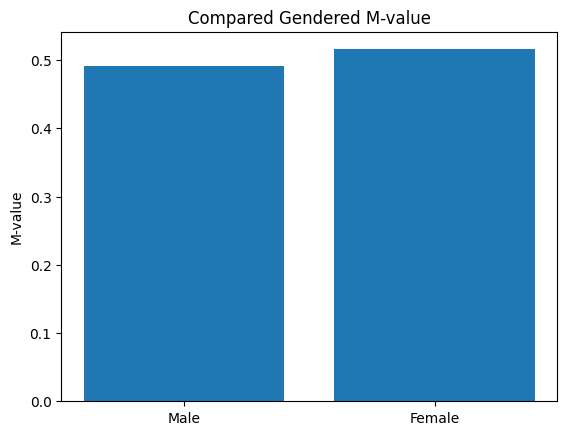

[0.49077385663986206, 0.5158697366714478]


In [39]:
male = np.array([1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0])
female = np.array([0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0])

male = torch.tensor(male, dtype=torch.float32)
female = torch.tensor(female, dtype=torch.float32)

male = male.to(device)
female = female.to(device)
m_1 = float(model.forward(male,female))
m_2 = float(model.forward(female,male))

[m_1, m_2]

plt.bar(['Male', 'Female'],[m_1, m_2])
plt.ylabel('M-value')
plt.title('Compared Gendered M-value')

plt.show()
print([m_1, m_2]
)

In [43]:
labels.index('Pregnant')

2

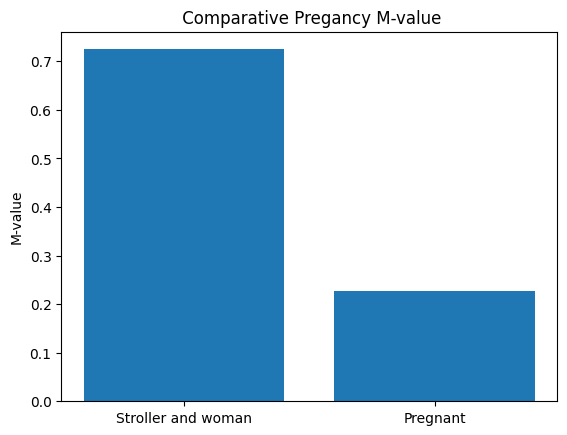

[0.7245202660560608, 0.22728565335273743]


In [47]:
# pregnant woman vs a woman and a stroller vs a woman and a girl
stroller = np.array([0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0])
girl = np.array([0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0])
pregnant = np.array([0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0])

stroller = torch.tensor(stroller, dtype=torch.float32)
pregnant = torch.tensor(pregnant, dtype=torch.float32)

stroller = stroller.to(device)
pregnant = pregnant.to(device)
m_1 = float(model.forward(stroller,pregnant))
m_2 = float(model.forward(pregnant,stroller))

[m_1, m_2]

plt.bar(['Stroller and woman', 'Pregnant'],[m_1, m_2])
plt.ylabel('M-value')
plt.title(' Comparative Pregancy M-value')

plt.show()
print([m_1, m_2])


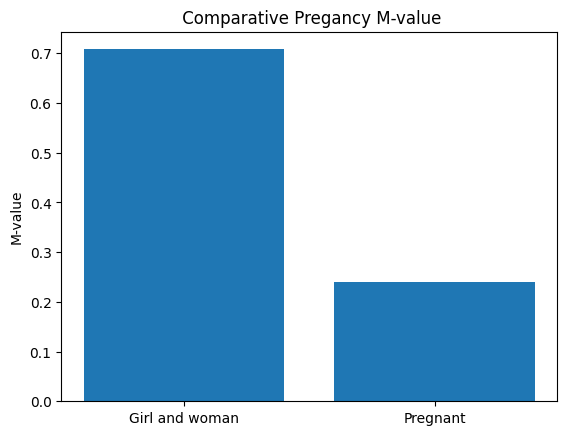

[0.7081298232078552, 0.24078866839408875]


In [48]:
# pregnant woman vs a woman and a stroller vs a woman and a girl
stroller = np.array([0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0])
girl = np.array([0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0])
pregnant = np.array([0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0])

girl = torch.tensor(girl, dtype=torch.float32)
pregnant = torch.tensor(pregnant, dtype=torch.float32)

girl = girl.to(device)
pregnant = pregnant.to(device)
m_1 = float(model.forward(girl, pregnant))
m_2 = float(model.forward(pregnant, girl))


plt.bar(['Girl and woman', 'Pregnant'],[m_1, m_2])
plt.ylabel('M-value')
plt.title(' Comparative Pregancy M-value')

plt.show()
print([m_1, m_2])


In [50]:
labels.index("Cat")

19

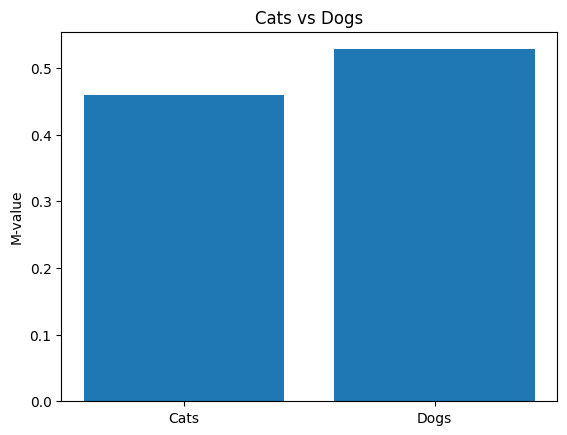

[0.4593099355697632, 0.5280854105949402]


In [51]:
cats = np.array([0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0])
dogs = np.array([0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0])

girl = torch.tensor(cats, dtype=torch.float32)
pregnant = torch.tensor(dogs, dtype=torch.float32)

girl = girl.to(device)
pregnant = pregnant.to(device)
m_1 = float(model.forward(girl, pregnant))
m_2 = float(model.forward(pregnant, girl))


plt.bar(['Cats', 'Dogs'],[m_1, m_2])
plt.ylabel('M-value')
plt.title('Cats vs Dogs')

plt.show()
print([m_1, m_2])


